# Polynomial Interpolation
Today's topics:
* Polynomial interpolation
* Error bound of interpolation
* Hermite polynomials
* Cubic splines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *

Let $P_n =$ the set of all polynomials with degree $ \leq n$.
Assume $x_0 < \dots< x_n$, and $(y_0, ... y_n)$ are given.

**Theorem**: If $p \in P_n$, $q \in Q_n$ with $p(x_i) = q(x_i)$, then p = q.

Proof: You can subtract $p-q$, and invoke the fundamental theorem of algebra to say that they must be the same because it has more than $n$ roots.

**Theorem**: Given $x_0 < \dots< x_n$ and $\{ y_0, \dots, y_n\}$, an interpolating polynomial exists with $p(x_i) = y_i$.

Proof 1 (Monomial basis): Let $p_n(x)  = a_0 + \dots + a_n x^n$. Then
$$ V a = y,$$
where V is the vandermonde matrix of monomials, $a = (a_0, \dots, a_n)$, and $y = (y_0, ... y_n)$.

From uniqueness, $Va = y$ and $Vb = y$ implies $a=b$, so V is full rank and always has a solution $a$.

Proof 2 (Lagrangian Basis)

### Lagrange basis
Let 

$$
L_k(x) = \prod_{i=0, i\neq k}^n \frac{x - x_i}{x_k - x_i}
$$

Then $L_k(x_i) = 1$ if $i=k$ and $0$ for $i \neq k$.

Write $p_n(x) = \sum_{k=0}^n y_k L_k(x)$.

Then $p_n \in P_n$, and $p_n(x_k) = y_k$.

The lagrange basis is preferred over the Vandermonde matrix because 
1. Computing the vantermonde is inefficient ($O(n^3)$)
2. Unstable: V is ill-conditioned.

## Error bound

**Theorem** Suppose $a \leq x_0 < ... < x_n = b$ and $p_n \in P_n$ is an interpolating polynomial such that $p_n(x_i) = f(x_i)$, where $f \in \mathcal{C}^{n+1}[a,b]$. Then for all $x \in [a,b]$, 

$$
R_n(x) = f(x) - p_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \pi_{n+1}(x)
$$

where $\pi_{n+1} (x) = (x - x_0)...(x - x_n) \in P_{n+1}$.

In particular

$$
|f(x) - p_n(x)| \leq \frac{M_{n+1}}{(n+1)!} |\pi_{n+1}(x)|.
$$

although $M_{n+1}$ may be pretty large.

Proof: See [here](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error). The main idea is to repeatedly use Rolle's theorem on an auxiliary function.

---
What does the error do as $n \to \infty$? Ideally, we would like this error to go to 0. But based on the expression for $R_n(x)$, it depends on our choice for the abscissas $x_i$.

Example: Runge's phenomena: Interpolating polynomial for interpolating $f(x) = \frac{1}{1 + 25x^2}$

On equally spaced points, we often get enormous errors for large $n$.

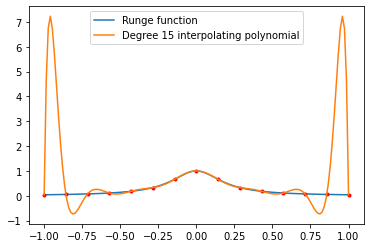

In [2]:
from scipy.interpolate import lagrange
n = 15
xs = linspace(-1,1,n)
xs_fine = linspace(-1,1,10*n)

f = lambda x : 1/(1 + 25 * x**2)
p = lagrange(xs, f(xs))

plt.plot(xs_fine, f(xs_fine), label='Runge function')
plt.plot(xs, f(xs), 'r.')
plt.plot(xs_fine, p(xs_fine), label='Degree 15 interpolating polynomial')
plt.legend()

## Hermite interpolation

Given $x_0 < ... < x_n$, $y_0, ..., y_n$, and $z_0, ..., z_n$,
we want a polynomial of degree 2n+1 such that $p_{2n+1}(x_i) = y_i$ and $p'_{2n+1}(x_i) = z_i$.

**Theorem** (Uniqueness) A polynomial satisfying the above conditions is unique.

We prove this by again looking at the difference $p-q$


**Theorem** (Existence) $p \in P_{n+1}$ satisfying the above conditions is unique.
We can prove this by generalizing the vandermonde matrix, but here we'll use the Hermite basis.

Let $ H_k(x) = L_k(x)^2 \left(1 - 2 L_k'(x_k)(x-x_k)\right) \in P_{2n+1}$

and $ K_k(x) = L_k(x)^2 (x - x_k) \in P_{2n+1}$

where $L_k(x_i)$ is the lagrange basis polynomial.

We have the following:
* $H_k(x_i)$ is 1 if $k=i$ and 0 for $k\neq i$.
* $H_k'(x_i) = 0$
* $K_k(x_i) = 0$
* $K_k'(x_i) = 1$, if $k=i$, and 0 if $k \neq i$

With all this, we can set
$$
    p_{2n+1}(x) = \sum_{k=0}^n y_k H_k(x) + z_k K_k(x)
$$

Then $p_{2n+1}(x_l) = y_l$, and $p_{2n+1}'(x_l) = z_l$.

Basically we cooked up our $H_k$ and $K_k$ using our Lagrange polynomial basis to match some nice conditions.

## Cubic splines
Use $p \in P_3$ on each interval $[x_{i-1}, x_{i+1}]$

Let $f \in \mathcal{C}[a,b]$ and $a=x_0 \leq ... \leq x_n=b$.
Let $h_i = (x_i - x_{i-1})$ and $$S = \{ s \in \mathcal{C}^2[a,b] : s(x_i) = f(x_i), i=0, \dots, m \} $$

such that $s$ is a cubic polynomial on $[x_{i-1}, x_{i+1}]$

How many degrees of freedom are there for $s$?
* 4 for each cubic: 4m
* Subtract m+1 interpolation abscissas
* Subtract 3(m-1) continuity conditions for each $s$, $s'$, and $s''$.

2 degrees of freedom remain.

*Natural spline condition*: $s''(x_0) = s''(x_m) = 0$

**Constructing S**

Let $ \sigma_i = s''(x_i)$

Since $s$ is cubic, $s''$ is linear on each $[x_{i-1}, x_{i+1}]$. So

$s''(x) = \frac{x_i - x}{h_i} \sigma_{i-1} + \frac{x - x_{i-1}}{h_i} \sigma_{i}$ will satisfy the boundary conditions at $x_{i-1}$, $x_i$.

Integrate twice:

$$
s(x) = \frac{(x_i - x)^3}{6h_i}\sigma_{i-1} + \frac{(x - x_{i-1})^3}{6h_i}\sigma_{i} + \alpha_i (x - x_{i-1}) + \beta_i(x_i - x)
$$

We can solve for $\alpha_i$ and $\beta_i$ by imposing the matching conditions:
$s(x_{i-1}) = f(x_{i-1})$, $s(x_{i}) = f(x_{i})$.


...

Tridiagonal system for finding sigmas.

## Chebyshev approximation
Chebyshev points $x_j = \Re z_j$ where $z_j = e^{i \theta_j}$. So $x_j = \cos(j\pi/n)$ for $0 \leq j \leq n$.

An interpolating polynoial at Chebyshev points is called the *chebyshev interpolant* of $f$.

The Chebyshev interpolating points do much better at approximating underlying function than equally spaced points, for example.



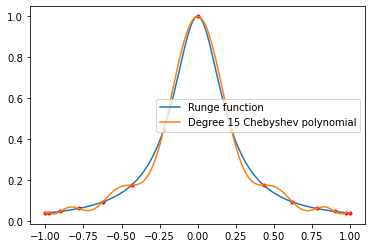

In [3]:
from numpy.polynomial.chebyshev import chebpts1, chebpts2

n = 15
xs = chebpts2(n)
xs_fine = linspace(-1,1,10*n)

f = lambda x : 1/(1 + 25 * x**2)
p = lagrange(xs, f(xs))

plt.plot(xs_fine, f(xs_fine), label='Runge function')
plt.plot(xs, f(xs), 'r.')
plt.plot(xs_fine, p(xs_fine), label='Degree 15 Chebyshev polynomial')
plt.legend()

## Chebyshev, Fourier and Laurent series

Chebyshev expansion on $[-1,1]$: $f(x) = \sum_{k=0}^n a_k T_k(x)$, where $T_k$ is the k-th Chebyshev polynomial.

Laurent: Given $f(x)$ on $[-1, 1]$, define $F(z)$ on $|z| = 1$as

$$F(z) = f(x), \textrm{ where } x = \frac{z + z^{-1}}{2}$$

$$ = \frac{1}{2} \sum a_k (z^k + z^{-k}) $$

Define the k-th Chebyshev polynomial by $T_k(x) = \frac{1}{2}(z^k + z^{-k}) = \cos(k \theta)$ where 
$x = \frac{1}{2}(z+ z^{-1}) = \cos \theta$.

What is $T_k(x_j)$ where $x_j$ are the Chebyshev points? $T_k(x_j) = \cos (k \cos^{-1} (\cos (j\pi/k))) \in \{-1, 1\}$. So the Chebyshev points occur at the extrema of the Chebyshev polynomial.

Is $T_k(x)$ even a polynomial in $x$? Observe

$$x \cdot 2T_k(x) = T_{k+1}(x) + T_{k-1}(x)$$

so we get a recurrence relation: 
$$T_{k+1}(x) = x \cdot 2T_k(x) - T_{k-1}(x)$$
where $T_0(x) =1$ and $T_1(x) = \cos(\cos^{-1} x) = x$

So the first few polynomials are: $T_0(x) =1$, $T_1(x) = x$, $T_2(x) = 2x^2 - 1$, $T_3(x) = 4x^3 - 3x$... 

and in general: $T_k(x) = 2^{k-1}x^k + \textrm{lower order terms}$.

$T_k$ forms a basis for $P_n$

Coefficients of $p$ are related to values at $x_0, \dots, x_n$ by a linear map, but it would best to relate it to the Chebyshev basis $T_0, \dots, T_n$. The method of computing this uses the FFT, so can be done quickly: $O(n\log n)$ operations. This is what the MATLAB module Chebfun does.

Assume $f$ is Lipschitz continuous on $[-1, 1]$: There is some $c$ such that $|f(x) - f(y)| \leq c|x - y|$ for all x, y. 

**Theorem**: If $f$ is Lipschitz continuous on $[-1, 1]$, it has a unique Chebyshev series

$$f(x) = \sum_{k=0}^\infty a_k T_k(x)$$

which converges absolutely and uniformly.

The coefficients are given by 
$$ a_k = \frac{2}{\pi} \int_{-1}^1 \frac{f(x) T_k(x)}{\sqrt{1-x^2}} \ dx.  $$

So instead of using the function $f$ we can work with $p_n(x) = \sum_{k=0}^\infty c_k T_k(x)$, the Chebyshev interpolant, *or* just truncate the series by $f_n(x) = \sum_{k=0}^n a_k T_k(x)$. The `Chebfun` module works with the chebyshev interpolant. How?

* *Option 1*. Precompute $c_k$ via the FFT and evaluate $p_n(x)$ via *Clenshaw's algorithm*. (This is done by Chebfun version 5+).
* *Option 2*. Just use the interpolated values to evaluate $p_n(x)$ using the *barycentric interpolation formulas*. This is done by Chebfun v 1-4.

## Barycentric interpolation formula
Recall $p(x) = \sum_{j=0}^n f_j l_j(x)$ where $l_j$ is the Lagrange polynomial basis $l_j= \prod_{i=0, i\neq j}^n \frac{x - x_i}{x_j - x_i}$. This is $O(n)$ flops for each $j$, and $O(n^2)$ to compute for each $x$.

Define $l(x) = \prod_{j=0}^n (x - x_j)$. Then $l'(x) = \sum_{j=0}^n \prod_{k \neq j} (x - x_k)$, so $l'(x_j) = \prod_{k \neq j} (x - x_j)$.

So $l_j(x) = \frac{l(x)}{x_j - x_k} \frac{1}{l'(x_j)} = \frac{l(x)}{x_j - x_k} \lambda_j$ where $\lambda_j = \frac{1}{l'(x_j)}$.

Then $$ p(x) = \sum_{j=0}^n f_j l_j(x) = l(x) \sum_{j=0}^n \frac{\lambda_j}{x - x_j} f_j $$

Note that 

$$
\sum_j l_j(x) = \sum
$$

so $\sum_{j=0}^n l_j(x) = 1$ for all x, since it is a polynomial of degree n